In [1]:
import tensorflow as tf

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

vgg = VGG16(weights="imagenet", include_top=False)

> `preprocess_input`: 남의 모델 갖다 쓸때, 전처리를 어떻게 했는가를 봐야한다.
파라미터 설영
    - weight and include_top

In [8]:
vgg.layers

In [11]:
a, b = vgg.layers[1].get_weights()

In [12]:
a[...,0][...,1]

array([[ 0.55037946,  0.44007453, -0.08138704],
       [ 0.34573907,  0.04063221, -0.4535013 ],
       [-0.05863491, -0.33066967, -0.4850302 ]], dtype=float32)

In [13]:
import matplotlib.pyplot as plt

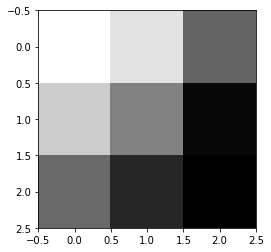

In [16]:
plt.imshow(a[...,0][...,1], cmap="gray")

---

https://keras.io/ko/applications/#vgg16

In [32]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False) # include_top=False는 classification layer 제외

In [22]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [21]:
img_path = 'practice/tennis.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)

# batch 차원 추가하기
x = x[np.newaxis] # 또는 x = np.expand_dims(x, axis=0)

# 우선 preprocess 없이 해보자.
# x = preprocess_input(x)

In [23]:
features = model.predict(x)

In [26]:
# preprocess 안 했을 때 결과

features.shape

(1, 7, 7, 512)

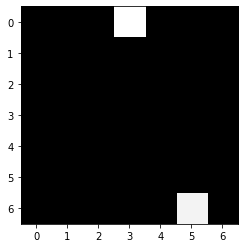

In [30]:
plt.imshow(features[0,:,:,0], cmap="gray")
plt.show()

---

In [33]:
from tensorflow.keras.applications.vgg19 import VGG19

model2 = VGG19(include_top=False, weights="imagenet")
model2.summary()

80142336/80134624 [==============================] - 28s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_____________________________________________________________

In [34]:
img_path = "practice/tennis.jpg"
x = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(x)
x = preprocess_input(x)

In [36]:
x = x[np.newaxis]

In [37]:
feature_map = model2.predict(x)

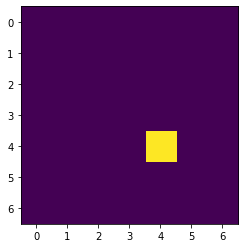

In [39]:
plt.imshow(feature_map[0,:,:,0])
plt.show()

In [41]:
from tensorflow.keras import Model

model3 = Model(inputs=model2.input, outputs=model2.get_layer("block2_conv2").output)

In [42]:
feature_map = model3.predict(x)

In [44]:
feature_map.shape

(1, 112, 112, 128)

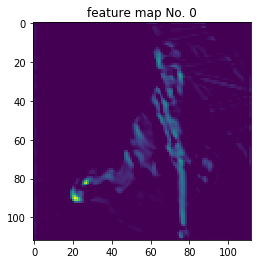

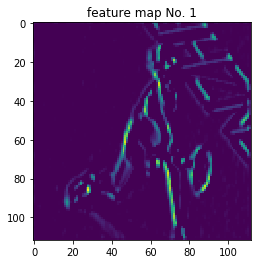

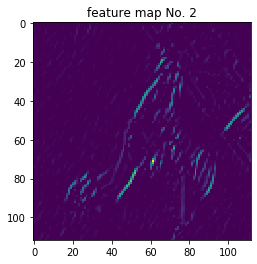

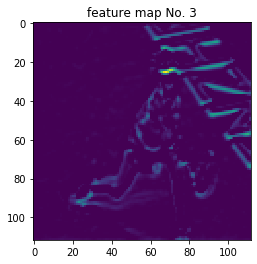

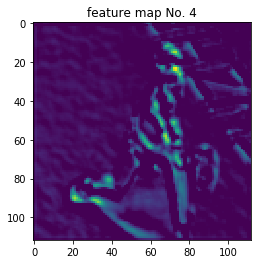

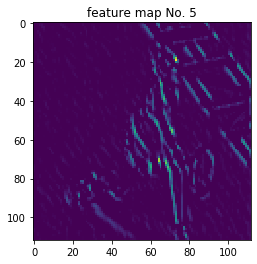

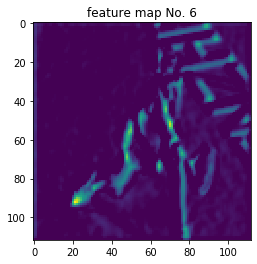

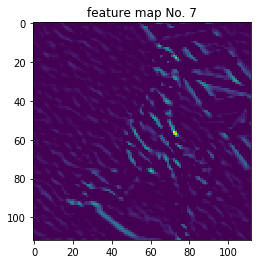

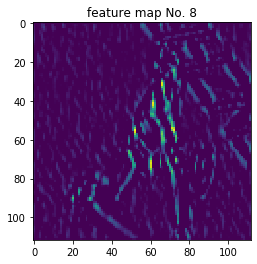

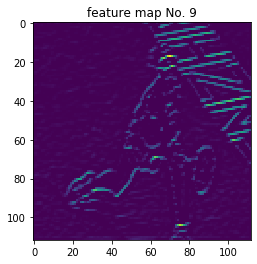

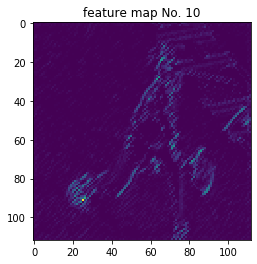

In [54]:
until = 10

for _ in range(feature_map.shape[-1]):
    plt.imshow(feature_map[0,:,:,_])
    plt.title("feature map No. {}".format(_))
    plt.show()
    if _ == until:
        break

In [ ]:
fig, axes = plt.subplot((5,5))

for _ in range(feature_map.shape[-1]):
    plt.imshow(feature_map[0,:,:,_])
    plt.title("feature map No. {}".format(_))
    plt.show()
    if _ == until:
        break